In [1]:
import numpy as np
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def stats(data, title):
  mean = np.nanmean(data)
  median = np.nanmedian(data)
  std = np.nanstd(data)
  range = np.nanmax(data)-np.nanmin(data)
  q25 = np.nanpercentile(data, 25)
  q75 = np.nanpercentile(data, 75)
  asymmetry = data.skew()
  excess = data.kurt()

  stats = {title: [mean, median, std, range, q25, q75, asymmetry, excess]}

  return pd.DataFrame(stats)

# 1. Исходный датасет без пропусков и ошибок ввода

In [19]:
file_path = 'data/r29i_os_73.sav'
df, meta = pyreadstat.read_sav(file_path) 

df = df[['yj13.2','yj72.18a','yj6.2','yj10.2','yj21b']]
df.rename(columns = {'yj13.2':'ЗП',
                     'yj72.18a':'Образование',
                     'yj6.2':'Рабочая неделя',
                     'yj10.2':'Премия',
                     'yj21b':'Отпуск'},
                inplace = True)

values_to_remove = [99999997, 99999998, 99999999] 
df = df[~df.isin(values_to_remove)]
df['Премия'] = df['Премия'].replace(99999996, np.nan)


df.dropna(inplace = True)
df.describe()

,ЗП,Образование,Рабочая неделя,Премия,Отпуск
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,35397.891566,7.454819,42.138554,8507.382530,30.415663
std,20207.837650,3.034705,7.483239,8600.805714,11.328204
min,8000.000000,1.000000,16.000000,200.000000,7.000000
25%,22000.000000,5.000000,40.000000,3000.000000,28.000000
50%,30000.000000,6.000000,40.000000,5000.000000,28.000000
75%,45000.000000,10.000000,45.000000,10000.000000,36.000000
max,200000.000000,16.000000,84.000000,60000.000000,60.000000


Сабсет заработной платы

In [4]:
dataset1_zp = df['ЗП']

Сабсет рабочих часов на неделе

In [5]:
dataset1_rn = df['Рабочая неделя']

Стат.характеристики для образования (дискретная величина)

In [6]:
data1 = df['Образование'].copy()
data1.replace({1:1, # Замена на бОльшие группы
              2:1,
              3:2,
              4:2,
              5:2,
              6:2,
              10:3,
              11:3,
              12:3,
              13:4,
              14:4,
              15:2,
              16:4,
              17:4},
             inplace = True)
freq1 = data1.value_counts()
freq1

Образование
3.0    154
2.0    150
1.0     27
4.0      1
Name: count, dtype: int64

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_69080/2293838780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq1.values,y=freq1.index,  palette='viridis', orient='h')


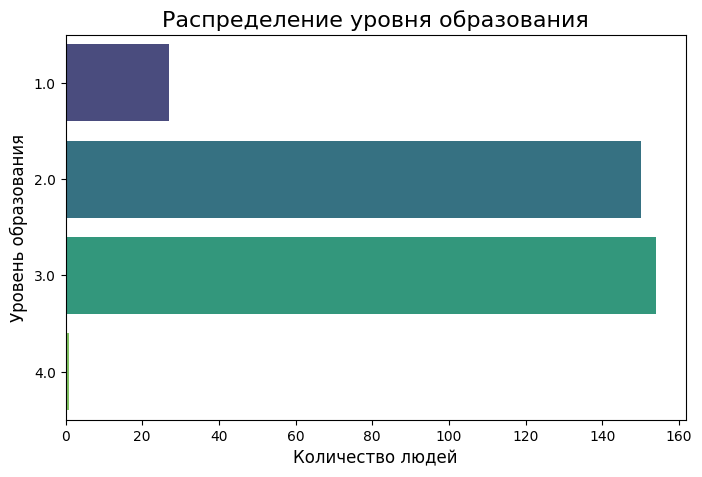

In [7]:
# Построение гистограммы
plt.figure(figsize=(8, 5))
sns.barplot(x=freq1.values,y=freq1.index,  palette='viridis', orient='h')

plt.title('Распределение уровня образования', fontsize=16)
plt.ylabel('Уровень образования', fontsize=12)
plt.xlabel('Количество людей', fontsize=12)
plt.show()


Сабсет премии за прошлый месяц

In [8]:
dataset1_prem = df['Премия']

Сабсет дней отпуска за последний год



In [9]:
dataset1_otp = df['Отпуск']

# 2. Датасет с заменой пропусков на среднее значение

In [11]:
file_path = 'data/data_mean.sav'
df, meta = pyreadstat.read_sav(file_path)

df.describe()

,ЗП,Образование,РабочаяНеделя,Премия,Отпуск,Удовлетворенность
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000
mean,26836.833858,2.201058,42.470018,6483.539165,27.416516,2.214874
std,11889.452108,0.650803,6.141463,1449.041054,6.717209,0.779389
min,1081.000000,1.000000,28.000000,200.000000,8.000000,1.000000
25%,18000.000000,2.000000,40.000000,6487.010782,27.490365,2.000000
50%,25000.000000,2.000000,40.000000,6487.010782,27.490365,2.000000
75%,33000.000000,3.000000,48.000000,6487.010782,28.000000,3.000000
max,68000.000000,4.000000,60.000000,20000.000000,51.000000,5.000000


Сабсет ЗП

In [12]:
dataset2_zp = df['ЗП']

Сабсет рабочей недели

In [13]:
dataset2_rn = df['РабочаяНеделя']

Стат.характеристики для образования (дискретная величина)

In [14]:
data2 = df['Образование'].copy()

freq2 = data2.value_counts()
freq2

Образование
2.0    1863
3.0    1092
1.0     434
4.0      13
Name: count, dtype: int64

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_69080/888284945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq2.values,y=freq2.index,  palette='viridis', orient='h')


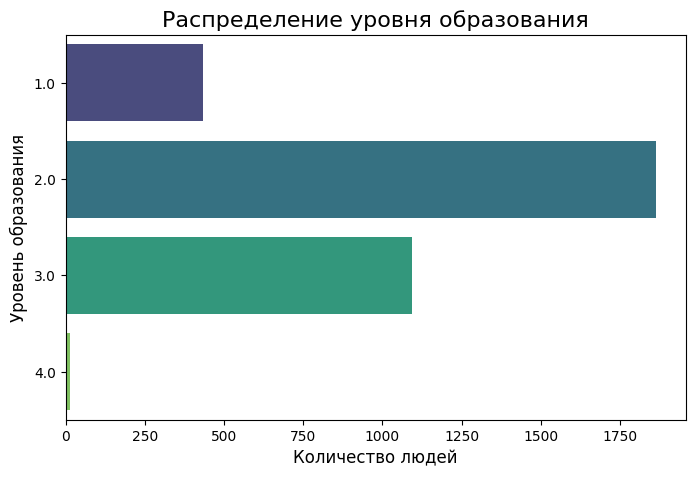

In [15]:
# Построение гистограммы
plt.figure(figsize=(8, 5))
sns.barplot(x=freq2.values,y=freq2.index,  palette='viridis', orient='h')

plt.title('Распределение уровня образования', fontsize=16)
plt.ylabel('Уровень образования', fontsize=12)
plt.xlabel('Количество людей', fontsize=12)
plt.show()


Сабсет премии

In [16]:
dataset2_prem = df['Премия']

Сабсет отпуска



In [20]:
dataset2_otp = df['Отпуск']

# 3. Датасет с заменой пропусков на медианное значение

In [22]:
file_path = 'data/data_median.sav'
df, meta = pyreadstat.read_sav(file_path)

df.describe()

,ЗП,Образование,РабочаяНеделя,Премия,Отпуск,Удовлетворенность
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000
mean,26660.402116,2.201058,42.470018,5135.962963,27.595532,2.214874
std,11899.935579,0.650803,6.141463,1509.408711,6.723581,0.779389
min,1081.000000,1.000000,28.000000,200.000000,8.000000,1.000000
25%,18000.000000,2.000000,40.000000,5000.000000,28.000000,2.000000
50%,25000.000000,2.000000,40.000000,5000.000000,28.000000,2.000000
75%,33000.000000,3.000000,48.000000,5000.000000,28.000000,3.000000
max,68000.000000,4.000000,60.000000,20000.000000,51.000000,5.000000


Сабсет ЗП

In [23]:
dataset3_zp = df['ЗП']

Сабсет рабочей недели

In [24]:
dataset3_rn = df['РабочаяНеделя']

Стат.характеристики для образования (дискретная величина)

In [25]:
data3 = df['Образование'].copy()

freq3 = data3.value_counts()
freq3

Образование
2.0    1863
3.0    1092
1.0     434
4.0      13
Name: count, dtype: int64

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_69080/884921015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq3.values,y=freq3.index,  palette='viridis', orient='h')


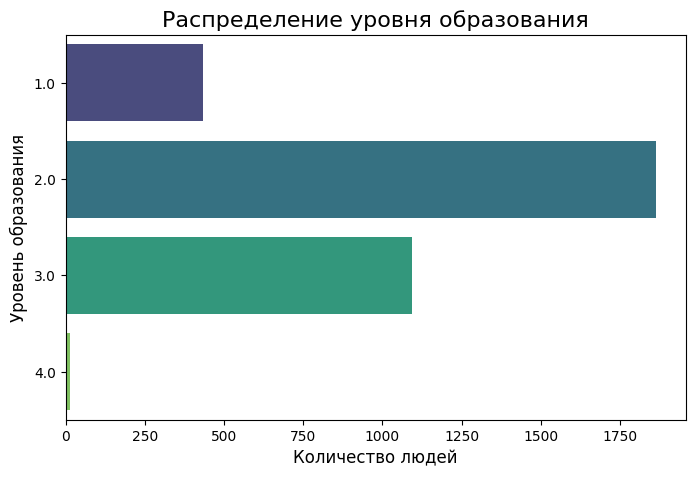

In [26]:
# Построение гистограммы
plt.figure(figsize=(8, 5))
sns.barplot(x=freq3.values,y=freq3.index,  palette='viridis', orient='h')

plt.title('Распределение уровня образования', fontsize=16)
plt.ylabel('Уровень образования', fontsize=12)
plt.xlabel('Количество людей', fontsize=12)
plt.show()


Сабсет премии

In [27]:
dataset3_prem = df['Премия']

Сабсет отпуска



In [28]:
dataset3_otp = df['Отпуск']

# 4. Датасет с сэмплированными данными

In [30]:
file_path = 'data/df2.csv'
df = pd.read_csv(file_path)

df = df[['yj13.2','yj72.18a','yj6.2','yj10.2','yj21b']]
df.rename(columns = {'yj13.2':'ЗП',
                     'yj72.18a':'Образование',
                     'yj6.2':'Рабочая неделя',
                     'yj10.2':'Премия',
                     'yj21b':'Отпуск'},
                inplace = True)

df.describe()

,ЗП,Образование,Рабочая неделя,Премия,Отпуск
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000
mean,26753.449875,2.201058,42.470018,6045.898853,27.691946
std,12327.800162,0.650803,6.141463,4167.538439,8.224631
min,1081.000000,1.000000,28.000000,200.000000,8.000000
25%,18000.000000,2.000000,40.000000,2880.703673,24.000000
50%,25000.000000,2.000000,40.000000,5000.000000,28.000000
75%,35000.000000,3.000000,48.000000,8235.430504,32.000000
max,68000.000000,4.000000,60.000000,20000.000000,51.000000


Сабсет ЗП

In [31]:
dataset4_zp = df['ЗП']

Сабсет рабочей недели

In [32]:
dataset4_rn = df['Рабочая неделя']

Стат.характеристики для образования (дискретная величина)

In [33]:
data4 = df['Образование'].copy()

freq4 = data4.value_counts()
freq4

Образование
2.0    1863
3.0    1092
1.0     434
4.0      13
Name: count, dtype: int64

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_69080/884921015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq3.values,y=freq3.index,  palette='viridis', orient='h')


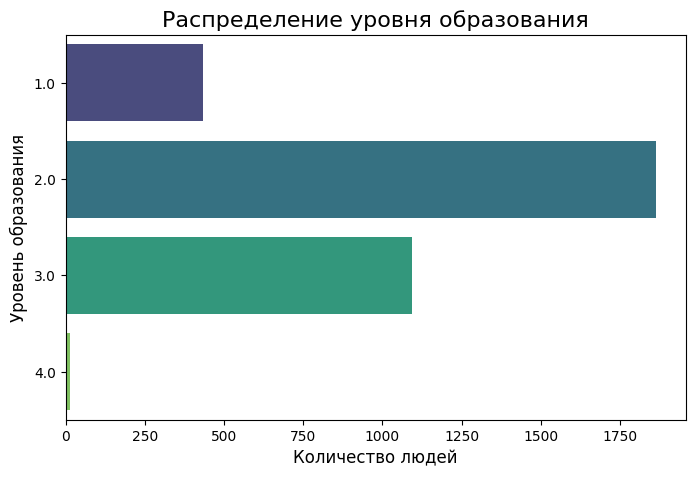

In [34]:
# Построение гистограммы
plt.figure(figsize=(8, 5))
sns.barplot(x=freq3.values,y=freq3.index,  palette='viridis', orient='h')

plt.title('Распределение уровня образования', fontsize=16)
plt.ylabel('Уровень образования', fontsize=12)
plt.xlabel('Количество людей', fontsize=12)
plt.show()


Сабсет премии

In [35]:
dataset4_prem = df['Премия']

Сабсет отпуска



In [36]:
dataset4_otp = df['Отпуск']

# Объединенные значения статистик

In [37]:
# Список вычисляемых статистик
characters = pd.DataFrame({"Стат.характеристика": ["Среднее", "Медиана", 'Стандартное отклонение', "Размах", '25%','75%', "Асимметрия", "Эксцесс"]})

**Статистические данные по заработной плате**

In [38]:
stats_zp = pd.concat([characters, stats(dataset1_zp, 'Датасет 1'), stats(dataset2_zp, 'Датасет 2'), stats(dataset3_zp, 'Датасет 3'), stats(dataset4_zp, 'Датасет 4')], axis=1)
stats_zp

,Стат.характеристика,Датасет 1,Датасет 2,Датасет 3,Датасет 4
0,Среднее,35397.891566,26836.833858,26660.402116,26753.449875
1,Медиана,30000.000000,25000.000000,25000.000000,25000.000000
2,Стандартное отклонение,20177.381208,11887.704559,11898.186489,12325.988183
3,Размах,192000.000000,66919.000000,66919.000000,66919.000000
4,25%,22000.000000,18000.000000,18000.000000,18000.000000
5,75%,45000.000000,33000.000000,33000.000000,35000.000000
6,Асимметрия,2.599485,0.786626,0.828745,0.765327
7,Эксцесс,13.939032,0.368804,0.404872,0.124377


**Статистические данные по рабочей неделе**

In [39]:
stats_rn = pd.concat([characters, stats(dataset1_rn, 'Датасет 1'), stats(dataset2_rn, 'Датасет 2'), stats(dataset3_rn, 'Датасет 3'), stats(dataset4_rn, 'Датасет 4')], axis=1)
stats_rn

,Стат.характеристика,Датасет 1,Датасет 2,Датасет 3,Датасет 4
0,Среднее,42.138554,42.470018,42.470018,42.470018
1,Медиана,40.000000,40.000000,40.000000,40.000000
2,Стандартное отклонение,7.471961,6.140560,6.140560,6.140560
3,Размах,68.000000,32.000000,32.000000,32.000000
4,25%,40.000000,40.000000,40.000000,40.000000
5,75%,45.000000,48.000000,48.000000,48.000000
6,Асимметрия,2.017340,0.917757,0.917757,0.917757
7,Эксцесс,8.646396,1.292191,1.292191,1.292191


**Статистические данные по премии за прошлый месяц**

In [40]:
stats_prem = pd.concat([characters, stats(dataset1_prem, 'Датасет 1'), stats(dataset2_prem, 'Датасет 2'), stats(dataset3_prem, 'Датасет 3'), stats(dataset4_prem, 'Датасет 4')], axis=1)
stats_prem

,Стат.характеристика,Датасет 1,Датасет 2,Датасет 3,Датасет 4
0,Среднее,8507.382530,6483.539165,5135.962963,6045.898853
1,Медиана,5000.000000,6487.010782,5000.000000,5000.000000
2,Стандартное отклонение,8587.842925,1448.828069,1509.186854,4166.925881
3,Размах,59800.000000,19800.000000,19800.000000,19800.000000
4,25%,3000.000000,6487.010782,5000.000000,2880.703673
5,75%,10000.000000,6487.010782,5000.000000,8235.430504
6,Асимметрия,2.456105,3.919670,5.998908,1.120619
7,Эксцесс,7.808316,40.098519,50.474169,0.814228


**Статистические данные по отпуску**

In [41]:
stats_otp = pd.concat([characters, stats(dataset1_otp, 'Датасет 1'), stats(dataset2_otp, 'Датасет 2'), stats(dataset3_otp, 'Датасет 3'), stats(dataset4_otp, 'Датасет 4')], axis=1)
stats_otp

,Стат.характеристика,Датасет 1,Датасет 2,Датасет 3,Датасет 4
0,Среднее,30.415663,30.415663,27.595532,27.691946
1,Медиана,28.000000,28.000000,28.000000,28.000000
2,Стандартное отклонение,11.311131,11.311131,6.722593,8.223423
3,Размах,53.000000,53.000000,43.000000,43.000000
4,25%,28.000000,28.000000,28.000000,24.000000
5,75%,36.000000,36.000000,28.000000,32.000000
6,Асимметрия,0.587123,0.587123,0.086116,0.082939
7,Эксцесс,0.235175,0.235175,1.717157,-0.077500


**Ящики с усами для всех переменных**

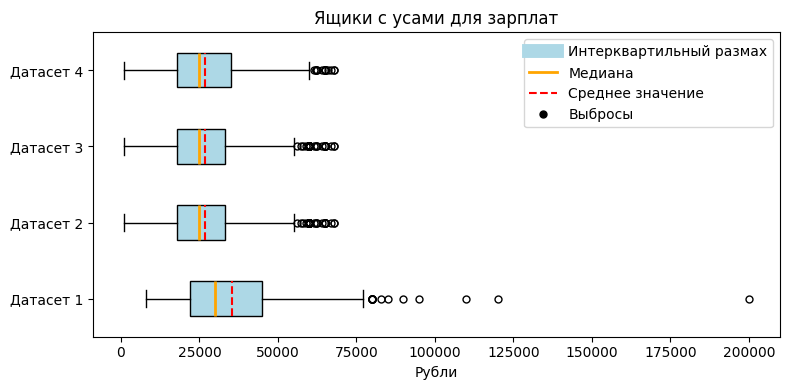

In [42]:
data = [dataset1_zp, dataset2_zp, dataset3_zp, dataset4_zp]
labels = ["Датасет 1", "Датасет 2", "Датасет 3", "Датасет 4"]

plt.figure(figsize=(8, 4))

# Построение ящика с усами
boxplot = plt.boxplot(data,
                      vert=False,
                      patch_artist=True,
                      showmeans=True,
                      meanline=True,
                      boxprops=dict(facecolor="lightblue", color="black"),
                      meanprops=dict(color="red", linestyle='--', linewidth=1.5),
                      medianprops=dict(color="orange", linewidth=2),
                      flierprops=dict(marker='o', color='black', markersize=5))

plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel("Рубли")
plt.title("Ящики с усами для зарплат")

legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=10, label='Интерквартильный размах'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Медиана'),
    plt.Line2D([0], [0], color='red', linestyle='--', lw=1.5, label='Среднее значение'),
    plt.Line2D([0], [0], marker='o', color='black', markersize=5, linestyle='None', label='Выбросы')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()


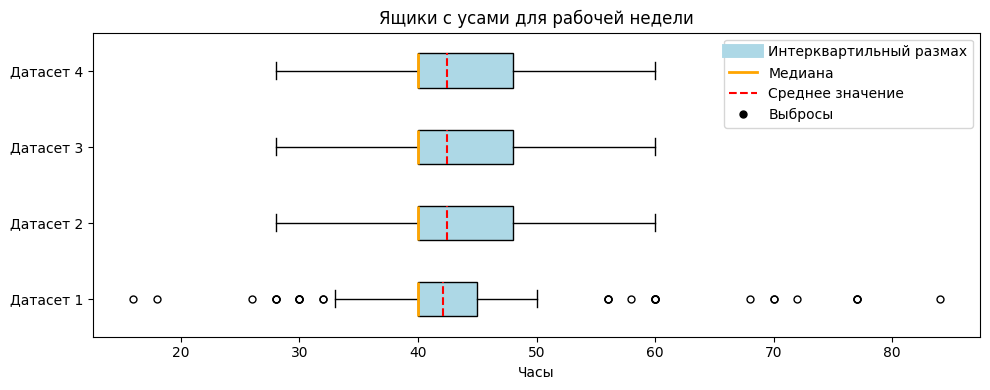

In [43]:
data = [dataset1_rn, dataset2_rn, dataset3_rn, dataset4_rn]
labels = ["Датасет 1", "Датасет 2", "Датасет 3", "Датасет 4"]

plt.figure(figsize=(10, 4))
data_np = [np.array(i.dropna()) for i in data]


boxplot = plt.boxplot(data_np,
                      vert=False,
                      patch_artist=True,
                      showmeans=True,
                      meanline=True,
                      boxprops=dict(facecolor="lightblue", color="black"),
                      meanprops=dict(color="red", linestyle='--', linewidth=1.5),
                      medianprops=dict(color="orange", linewidth=2),
                      flierprops=dict(marker='o', color='black', markersize=5))

plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel("Часы")
plt.title("Ящики с усами для рабочей недели")

legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=10, label='Интерквартильный размах'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Медиана'),
    plt.Line2D([0], [0], color='red', linestyle='--', lw=1.5, label='Среднее значение'),
    plt.Line2D([0], [0], marker='o', color='black', markersize=5, linestyle='None', label='Выбросы')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()

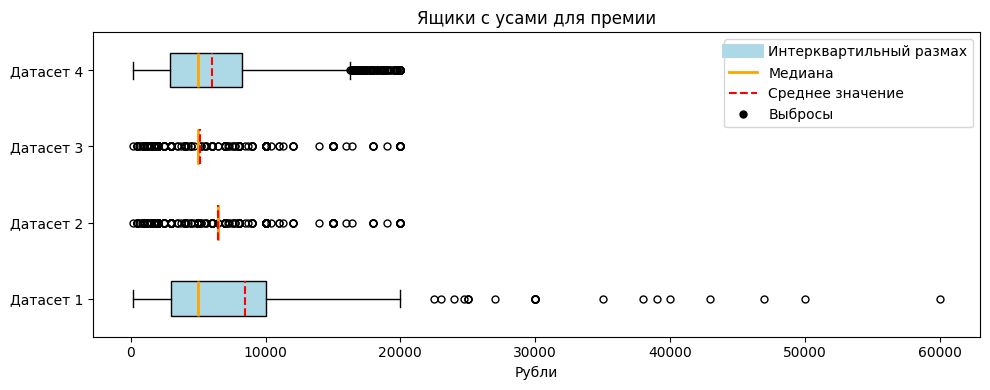

In [44]:
data = [dataset1_prem, dataset2_prem, dataset3_prem, dataset4_prem]
labels = ["Датасет 1", "Датасет 2", "Датасет 3", "Датасет 4"]

plt.figure(figsize=(10, 4))

boxplot = plt.boxplot(data,
                      vert=False,
                      patch_artist=True,
                      showmeans=True,
                      meanline=True,
                      boxprops=dict(facecolor="lightblue", color="black"),
                      meanprops=dict(color="red", linestyle='--', linewidth=1.5),
                      medianprops=dict(color="orange", linewidth=2),
                      flierprops=dict(marker='o', color='black', markersize=5))

plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel("Рубли")
plt.title("Ящики с усами для премии")

legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=10, label='Интерквартильный размах'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Медиана'),
    plt.Line2D([0], [0], color='red', linestyle='--', lw=1.5, label='Среднее значение'),
    plt.Line2D([0], [0], marker='o', color='black', markersize=5, linestyle='None', label='Выбросы')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()

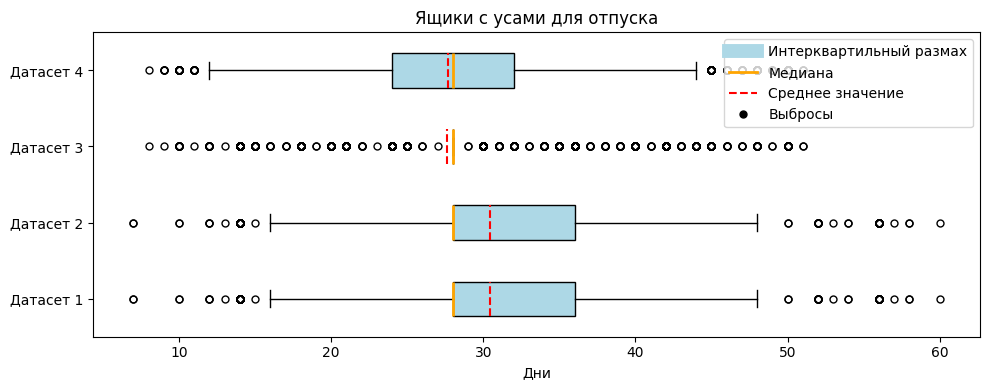

In [45]:
data = [dataset1_otp, dataset2_otp, dataset3_otp, dataset4_otp]
labels = ["Датасет 1", "Датасет 2", "Датасет 3", "Датасет 4"]

plt.figure(figsize=(10, 4))
data_np = [np.array(i.dropna()) for i in data]


boxplot = plt.boxplot(data_np,
                      vert=False,
                      patch_artist=True,
                      showmeans=True,
                      meanline=True,
                      boxprops=dict(facecolor="lightblue", color="black"),
                      meanprops=dict(color="red", linestyle='--', linewidth=1.5),
                      medianprops=dict(color="orange", linewidth=2),
                      flierprops=dict(marker='o', color='black', markersize=5))

plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel("Дни")
plt.title("Ящики с усами для отпуска")

legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=10, label='Интерквартильный размах'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Медиана'),
    plt.Line2D([0], [0], color='red', linestyle='--', lw=1.5, label='Среднее значение'),
    plt.Line2D([0], [0], marker='o', color='black', markersize=5, linestyle='None', label='Выбросы')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()